In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from sklearn.neighbors import KNeighborsClassifier

Repeating the exercise with sklearn
Reading csv data from the A1_dataset folder and splitting it

In [2]:
microchips = pd.read_csv('A1_datasets/microchips.csv', header=None)

X_train = np.array(microchips.iloc[:, :2].values)
y_train = np.array(microchips.iloc[:, 2].values)
X_test = np.array([[-0.3, 1.0],
                      [-0.5, -0.1],
                      [0.6, 0.0]])
k_values = [1, 3, 5, 7]
markers = {1: 'o', 0: 'x'}

1. Plot the original microchip data using different markers for the two classes OK and Fail.


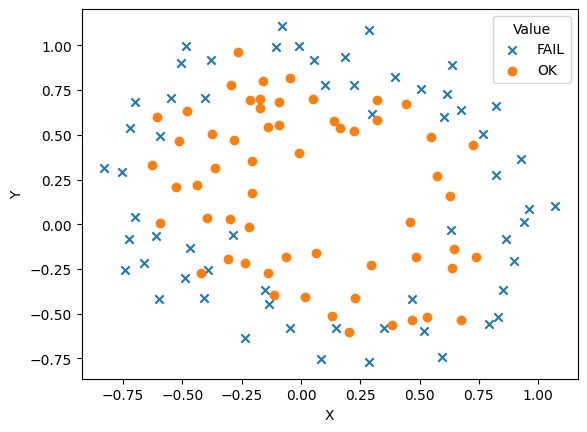

In [3]:
for value in set(y_train):
    mask = value == y_train
    plt.scatter(X_train[:, 0][mask], X_train[:, 1][mask], marker=markers[value], label="OK" if value == 1 else "FAIL")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Value')
plt.show()


2. Implement and use k-NN to predict whether three unknown microchips are likely to be OK
or Fail. The properties associated with the three unknown microchips are (−0.3, 1.0),(−0.5, −0, 1),
and (0.6, 0.0), and you should repeat the experiments for k = 1, 3, 5, 7. Hence, a total of
12 predictions.

In [4]:
for k in k_values:
    print("K value:" + str(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predicted = knn.predict(X_test)
    for i, label in enumerate(y_predicted):
        coords_str = ', '.join([f"{coord:0.1f}" for coord in X_test[i]])
        if label == 1:
            print(f"chip{i + 1}: [{coords_str}] ==> OK")
        else:
            print(f"chip{i + 1}: [{coords_str}] ==> FAIL")

K value:1
chip1: [-0.3, 1.0] ==> OK
chip2: [-0.5, -0.1] ==> FAIL
chip3: [0.6, 0.0] ==> FAIL
K value:3
chip1: [-0.3, 1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> FAIL
chip3: [0.6, 0.0] ==> OK
K value:5
chip1: [-0.3, 1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> OK
chip3: [0.6, 0.0] ==> OK
K value:7
chip1: [-0.3, 1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> FAIL
chip3: [0.6, 0.0] ==> OK


3. Display a 2 × 2 plot similar to Figure 1 showing the decision boundary and the training
error for k = 1, 3, 5, 7.

In [5]:
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx_flat = xx.ravel()
yy_flat = yy.ravel()
meshgrid_array = np.column_stack((xx_flat, yy_flat))


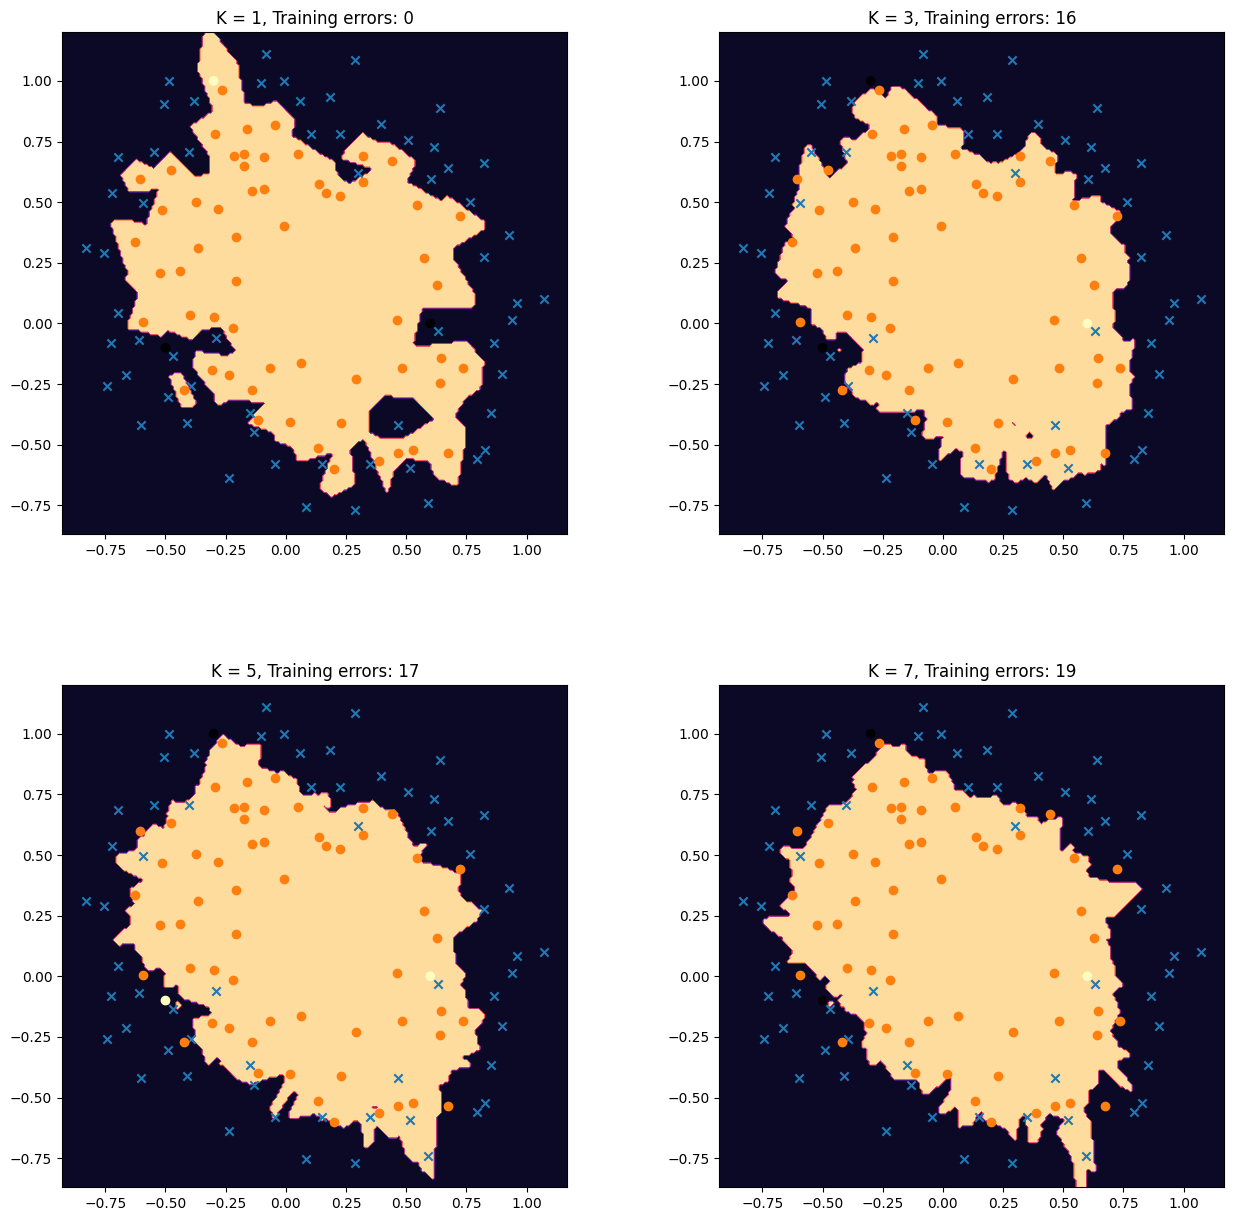

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4]

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    meshgrid_labels = knn.predict(meshgrid_array)
    knn_labels = knn.predict(X_test)
    diff = np.sum(y_train != knn.predict(X_train))
    ax = axes[i]
    cmap = matplotlib.colormaps['magma']
    ax.contourf(xx, yy, meshgrid_labels.reshape(xx.shape), cmap=cmap)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=knn_labels, cmap=cmap)
    for value in set(y_train):
        mask = value == y_train
        ax.scatter(X_train[:, 0][mask], X_train[:, 1][mask], marker=markers[value])
    ax.set_title("K = " + str(k) + ", Training errors: " + str(diff))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()